# Self-supervised deblending: ablation studies

**Authors: Nick Luiken, Matteo Ravasi - KAUST**

This notebook is intended to regenerate some of the figures shown in the paper and supplementary material related to our ablation studies. 

In order to be able to create the plots you will first need to run all the experiments in `scripts/selfsupervised-Deblending.sh` and set the environment variable `DATAPATH` to the `results` directory where the produced .npz files are stored.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt
import pylops

In [2]:
os.environ["DATAPATH"] = '/mnt/datawaha_dig/Users/luikenna/results'

### Dependence on inner iterations

In [3]:
data_inner_1 = np.load(os.path.join(os.environ["DATAPATH"], 'pnp_eps1.0_inner1_epochs30_stop_training1000.npz'))
data_inner_3 = np.load(os.path.join(os.environ["DATAPATH"], 'pnp_eps1.0_inner3_epochs30_stop_training1000.npz'))
data_inner_5 = np.load(os.path.join(os.environ["DATAPATH"], 'pnp_eps1.0_inner5_epochs30_stop_training1000.npz'))

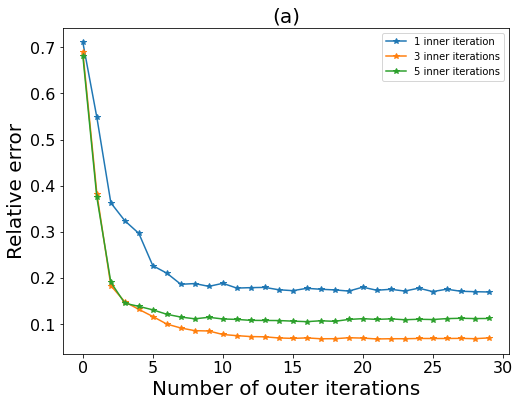

In [4]:
plt.figure(figsize=(8,6))
plt.plot(data_inner_1['error_denoised'], '*-', label='1 inner iteration')
plt.plot(data_inner_3['error_denoised'], '*-', label='3 inner iterations')
plt.plot(data_inner_5['error_denoised'], '*-', label='5 inner iterations')
plt.xlabel('Number of outer iterations', fontsize=20)
plt.ylabel('Relative error', fontsize=20)
plt.title('(a)', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend();

### Dependence on $\rho$

In [5]:
data_eps01_ep20 = np.load(os.path.join(os.environ["DATAPATH"], 'pnp_eps0.1_inner3_epochs20_stop_training1000.npz'))
data_eps10_ep30 = np.load(os.path.join(os.environ["DATAPATH"], 'pnp_eps10.0_inner3_epochs30_stop_training1000.npz'))
data_eps10_ep30_0 = np.load(os.path.join(os.environ["DATAPATH"], 'pnp_eps10.0_inner3_epochs30_stop_training1000_eps_0_first.npz'))
data_eps1_ep30 = np.load(os.path.join(os.environ["DATAPATH"], 'pnp_eps1.0_inner3_epochs30_stop_training1000.npz'))

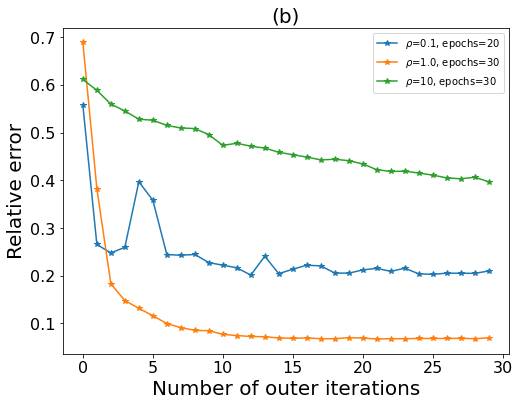

In [6]:
plt.figure(figsize=(8,6))
plt.plot(data_eps01_ep20['error_denoised'], '*-', label=r'$\rho$=0.1, epochs=20')
plt.plot(data_eps1_ep30['error_denoised'], '*-', label=r'$\rho$=1.0, epochs=30')
plt.plot(data_eps10_ep30_0['error_denoised'], '*-', label=r'$\rho$=10, epochs=30')
plt.xlabel('Number of outer iterations', fontsize=20)
plt.ylabel('Relative error', fontsize=20)
plt.title('(b)', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='upper right');

### Plot both $x$ and $y$ for different $\rho$

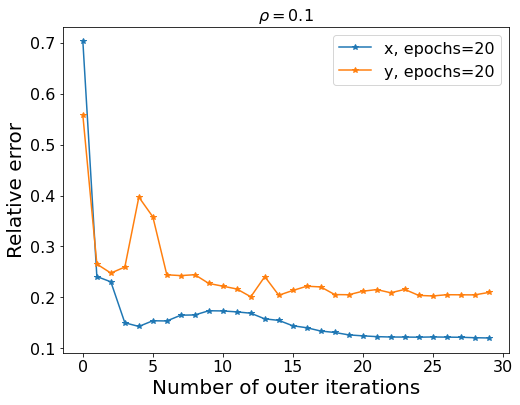

In [7]:
plt.figure(figsize=(8,6))
plt.plot(data_eps01_ep20['error'], '*-', label=r'x, epochs=20')
plt.plot(data_eps01_ep20['error_denoised'], '*-', label=r'y, epochs=20')
plt.xlabel('Number of outer iterations', fontsize=20)
plt.ylabel('Relative error', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.title(r'$\rho = 0.1$', fontsize=16);

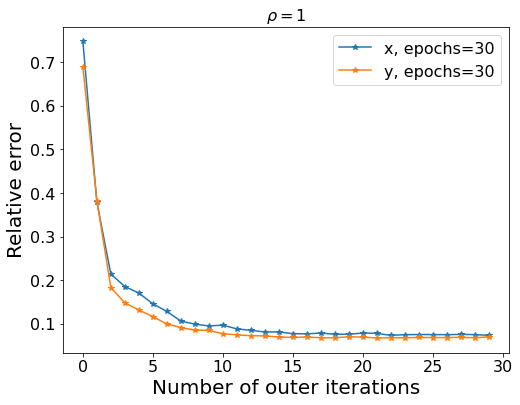

In [8]:
plt.figure(figsize=(8,6))
plt.plot(data_eps1_ep30['error'], '*-', label=r'x, epochs=30')
plt.plot(data_eps1_ep30['error_denoised'], '*-', label=r'y, epochs=30')
plt.xlabel('Number of outer iterations', fontsize=20)
plt.ylabel('Relative error', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.title(r'$\rho = 1$', fontsize=16);

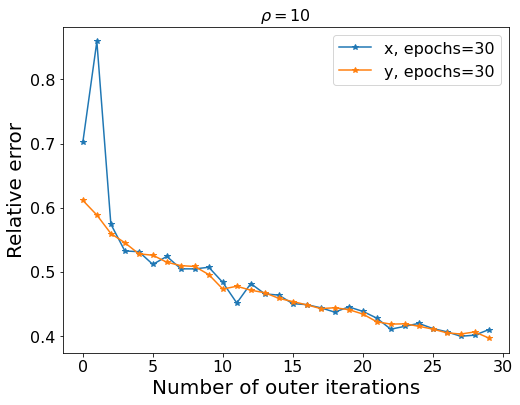

In [9]:
plt.figure(figsize=(8,6))
plt.plot(data_eps10_ep30_0['error'], '*-', label=r'x, epochs=30')
plt.plot(data_eps10_ep30_0['error_denoised'], '*-', label=r'y, epochs=30')
plt.xlabel('Number of outer iterations', fontsize=20)
plt.ylabel('Relative error', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.title(r'$\rho = 10$', fontsize=16);

### Pre-trained network

In [10]:
data_pretrained_ep20 = np.load(os.path.join(os.environ["DATAPATH"], 'pnp_eps1.0_inner3_epochs0_stop_training1000_pretrained20.npz'))
data_pretrained_ep30 = np.load(os.path.join(os.environ["DATAPATH"], 'pnp_eps1.0_inner3_epochs0_stop_training1000_pretrained30.npz'))

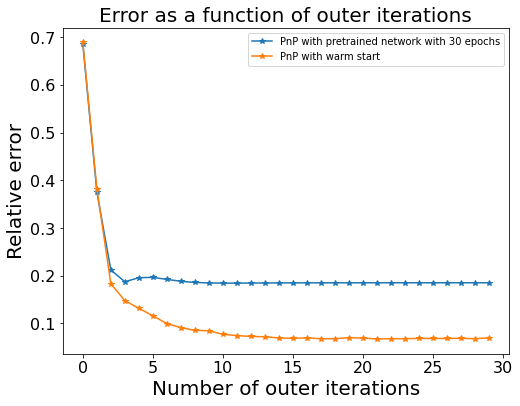

In [11]:
plt.figure(figsize=(8,6))
plt.plot(data_pretrained_ep30['error_denoised'], '*-', label='PnP with pretrained network with 30 epochs')
plt.plot(data_eps1_ep30['error_denoised'], '*-', label='PnP with warm start')
plt.xlabel('Number of outer iterations', fontsize=20)
plt.ylabel('Relative error', fontsize=20)
plt.title('Error as a function of outer iterations', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend();

### Stop training

In [12]:
data_stop_training_5 = np.load(os.path.join(os.environ["DATAPATH"], 'pnp_eps1.0_inner3_epochs30_stop_training5.npz'))
data_stop_training_10 = np.load(os.path.join(os.environ["DATAPATH"], 'pnp_eps1.0_inner3_epochs30_stop_training10.npz'))
data_stop_training_20 = np.load(os.path.join(os.environ["DATAPATH"], 'pnp_eps1.0_inner3_epochs30_stop_training20.npz'))

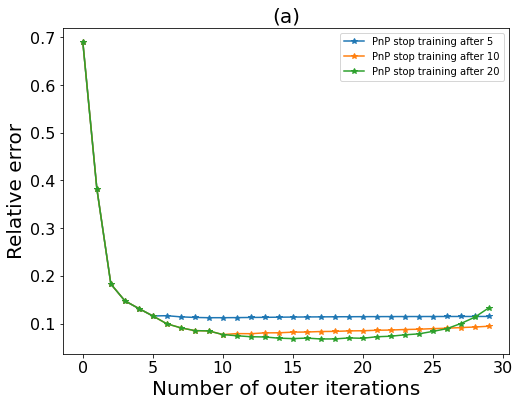

In [13]:
plt.figure(figsize=(8,6))
plt.plot(data_stop_training_5 ['error_denoised'], '*-', label='PnP stop training after 5')
plt.plot(data_stop_training_10['error_denoised'], '*-', label='PnP stop training after 10')
plt.plot(data_stop_training_20['error_denoised'], '*-', label='PnP stop training after 20')
plt.xlabel('Number of outer iterations', fontsize=20)
plt.ylabel('Relative error', fontsize=20)
plt.title('(a)', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend();

### Denoiser epochs

In [14]:
data_eps1_ep10 = np.load(os.path.join(os.environ["DATAPATH"],'pnp_eps1.0_inner3_epochs10_stop_training1000.npz'))
data_eps1_ep20 = np.load(os.path.join(os.environ["DATAPATH"],'pnp_eps1.0_inner3_epochs20_stop_training1000.npz'))
data_eps1_ep60 = np.load(os.path.join(os.environ["DATAPATH"],'pnp_eps1.0_inner3_epochs60_stop_training1000.npz'))
data_eps1_ep10_outer_60 = np.load(os.path.join(os.environ["DATAPATH"],'pnp_eps1.0_inner3_epochs10_stop_training1000_outer_60.npz'))

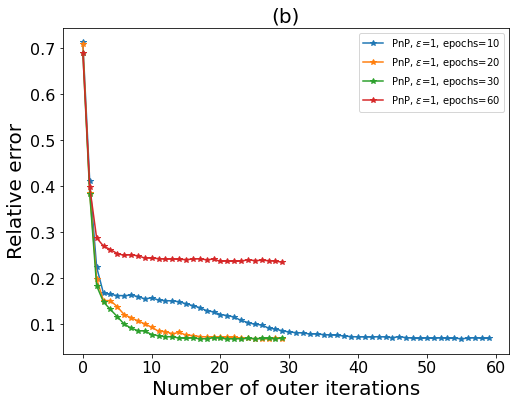

In [15]:
plt.figure(figsize=(8,6))
plt.plot(data_eps1_ep10_outer_60['error_denoised'], '*-', label='PnP, $\epsilon$=1, epochs=10')
plt.plot(data_eps1_ep20['error_denoised'], '*-', label='PnP, $\epsilon$=1, epochs=20')
plt.plot(data_eps1_ep30['error_denoised'], '*-', label='PnP, $\epsilon$=1, epochs=30')
plt.plot(data_eps1_ep60['error_denoised'], '*-', label='PnP, $\epsilon$=1, epochs=60')
plt.xlabel('Number of outer iterations', fontsize=20)
plt.ylabel('Relative error', fontsize=20)
plt.title('(b)', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend();

### Rerun with trained network

This experiment was done directly in the notebook. To redo this experiment, simply save the network that the plug_and_polay function returns, and rerun the function with initial_network=network_out

In [16]:
error_rerun_trained_network = np.load(os.path.join(os.environ["DATAPATH"], 'network-out.npy'))

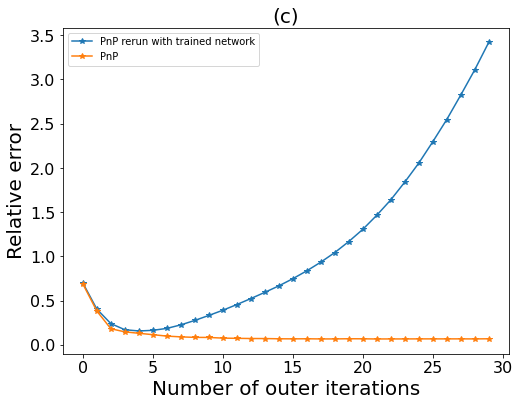

In [17]:
plt.figure(figsize=(8,6))
plt.plot(error_rerun_trained_network, '*-', label='PnP rerun with trained network')
plt.plot(data_eps1_ep30['error_denoised'], '*-', label='PnP')
plt.xlabel('Number of outer iterations', fontsize=20)
plt.ylabel('Relative error', fontsize=20)
plt.title('(c)', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend();

## Average for different seeds

In [18]:
data_seed = {}
error_denoised = {}
for i in range(10):
    data_seed[i] = np.load(os.path.join(os.environ["DATAPATH"], f'pnp_eps1.0_inner3_epochs30_stop_training1000_seed{i+1}.npz'))
    error_denoised[i] = data_seed[i]['error_denoised']

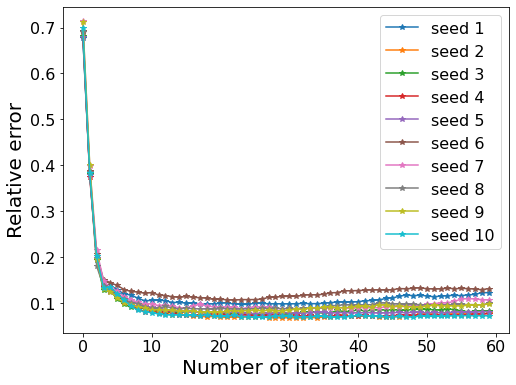

In [19]:
plt.figure(figsize=(8,6))
for i in range(10):
    plt.plot(error_denoised[i], '*-', label=f'seed {i+1}')
plt.xlabel('Number of iterations', fontsize=20)
plt.ylabel('Relative error', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16);

Compute the average and the standard deviation for all seeds

In [20]:
error_denoised_avg = 1/10 * sum(error_denoised[item] for item in error_denoised)
error_denoised_std = np.sqrt(1/9 * sum((error_denoised[item] - error_denoised_avg)**2 for item in error_denoised))

In [21]:
plot_error_denoised = np.zeros(10)
for i in range(10):
    plot_error_denoised[i] = error_denoised[i][29]

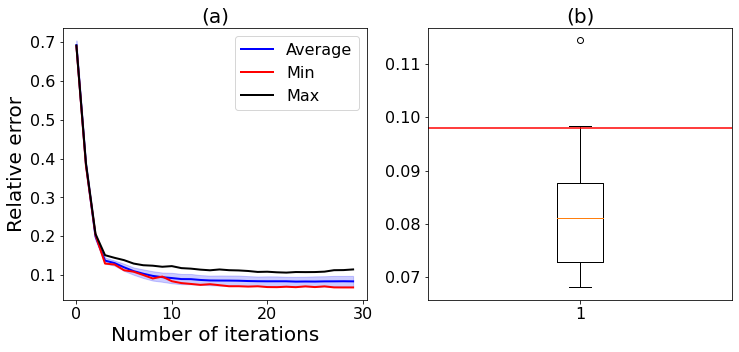

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(12,5))
axs[0].plot(error_denoised_avg[0:30], '-', color='b', linewidth=2, label='Average')
axs[0].fill_between(np.arange(30), error_denoised_avg[0:30] - error_denoised_std[0:30], error_denoised_avg[0:30] + error_denoised_std[0:30], color='b', alpha=0.2)
axs[0].plot(error_denoised[1][0:30], '-', color='r', linewidth=2, label='Min')
axs[0].plot(error_denoised[5][0:30], '-', color='k', linewidth=2, label='Max')
axs[0].set_xlabel('Number of iterations', fontsize=20)
axs[0].set_ylabel('Relative error', fontsize=20)
axs[0].xaxis.set_tick_params(labelsize=16)
axs[0].yaxis.set_tick_params(labelsize=16)
axs[0].legend(fontsize=16)
axs[0].set_title('(a)', fontsize=20);
axs[1].boxplot(plot_error_denoised)
# This is the error for the conventional patched Fourier approach
axs[1].axhline(0.098, color='r')
axs[1].xaxis.set_tick_params(labelsize=16)
axs[1].yaxis.set_tick_params(labelsize=16)
axs[1].set_title('(b)', fontsize=20);